Exploratory Data Analysis

In [2]:
import ast
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()
df["job_posted_date"] = pd.to_datetime(df.job_posted_date)
df["job_skills"] = df["job_skills"].apply(lambda x:  ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Liam McCann\Anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Filter for UK Data Scientist roles

In [3]:
df_DS_US = df[(df["job_title_short"] == "Data Scientist") & (df["job_country"] == "United States")]

Highest Job Count Locations:

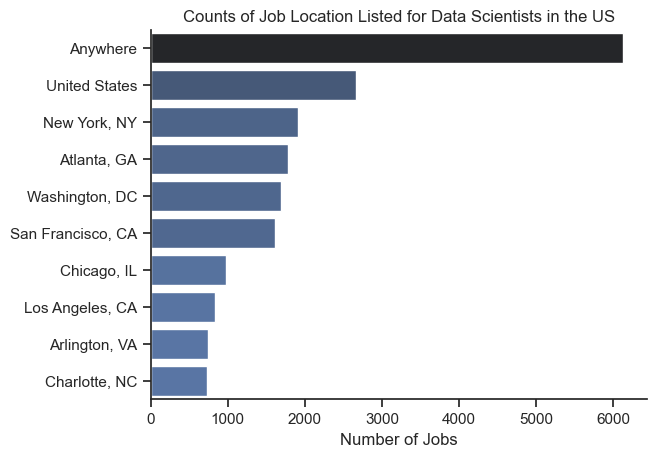

In [4]:
df_plot = df_DS_US["job_location"].value_counts().head(10).to_frame()
df_plot

sns.set_theme(style="ticks")
sns.barplot(data=df_plot, x="count", y="job_location", hue="count", palette="dark:b_r", legend=False)
sns.despine()
plt.title("Counts of Job Location Listed for Data Scientists in the US")
plt.xlabel("Number of Jobs")
plt.ylabel("")
plt.show()


Work from Home, Degree Requirment, and Health Insurance: 

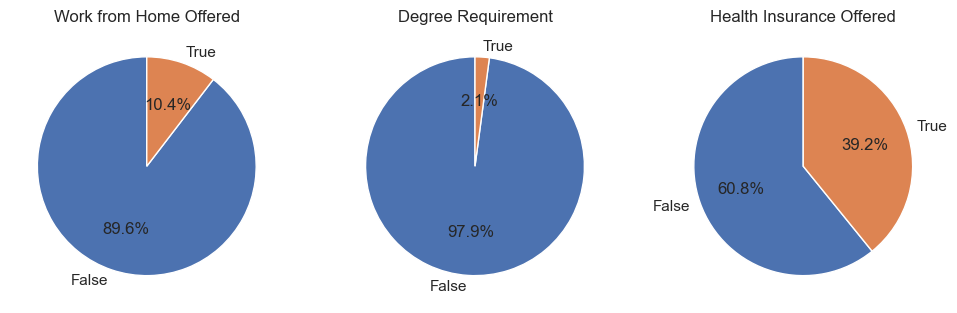

In [5]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12,5))

dict_column = {
    "job_work_from_home": "Work from Home Offered",
    "job_no_degree_mention": "Degree Requirement",
    "job_health_insurance": "Health Insurance Offered"
}

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DS_US[column].value_counts(), startangle=90, autopct="%1.1f%%", labels=["False", "True"])
    ax[i].set_title(title)
   

Companies to Explore:

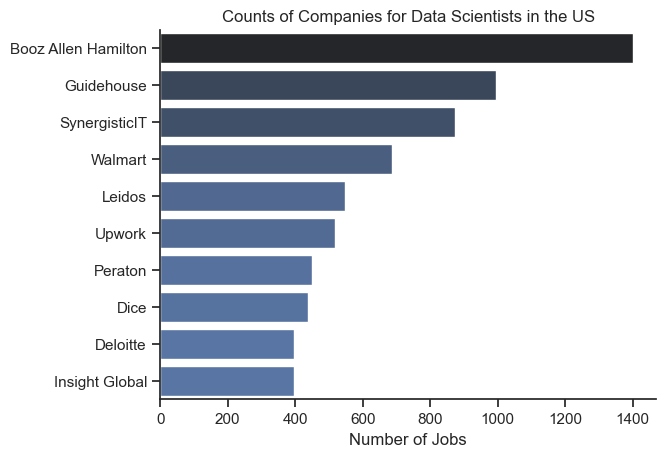

In [6]:
df_plot = df_DS_US["company_name"].value_counts().head(10).to_frame()
df_plot

sns.set_theme(style="ticks")
sns.barplot(data=df_plot, x="count", y="company_name", hue="count", palette="dark:b_r", legend=False)
sns.despine()
plt.title("Counts of Companies for Data Scientists in the US")
plt.xlabel("Number of Jobs")
plt.ylabel("")
plt.show()
